
**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [ ]:
import pandas as pd

# Завантаження даних
medical_df = pd.read_csv('/content/medical-charges.csv')

# Виведення перших 5 записів
print(medical_df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


**1. Групування за курінням (smoker)**

Ідея: Розділити дані на дві групи: курці та некурці.

Аналіз: Знайти середнє або медіанне значення charges для кожної групи.

Застосування: Якщо новий пацієнт є курцем — використовувати середнє значення для курців, якщо ні — для некурців.

**2. Сегментація за регіоном (region)**

Ідея: Розділити дані за регіонами та дослідити середні витрати по кожному.

Аналіз: Можливо, у певному регіоні медичні послуги дорожчі. Наприклад, середнє значення charges у southeast може бути суттєво інше, ніж у northwest.

Застосування: Для нових даних використовувати середнє значення по відповідному регіону.

**3. Категоріальний аналіз за статтю (sex)**

Ідея: Перевірити, чи є суттєва різниця в charges між чоловіками та жінками.

Застосування: Якщо різниця істотна, використовувати окремі середні значення для кожної статі.

**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [ ]:
import plotly.express as px

# Візуалізація розподілу charges за sex
fig_sex = px.histogram(medical_df, x='charges', color='sex', marginal='box', title='Розподіл медичних зборів за статтю')
fig_sex.show()

In [ ]:
# Візуалізація розподілу charges за region
fig_region = px.histogram(medical_df, x='charges', color='region', marginal='box', title='Розподіл медичних зборів за регіоном')
fig_region.show()

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [ ]:
# Візуалізація розподілу region відносно smoker
fig_region_smoker = px.histogram(medical_df, x='region', color='smoker', title='Розподіл регіонів за статусом курця')
fig_region_smoker.show()

In [ ]:
# Візуалізація розподілу children відносно smoker
fig_children_smoker = px.histogram(medical_df, x='children', color='smoker', title='Розподіл кількості дітей за статусом курця')
fig_children_smoker.show()

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [ ]:
fig_charges_children = px.violin(medical_df, x='children', y='charges', title='Розподіл медичних зборів за кількістю дітей')
fig_charges_children.show()

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [ ]:
def estimate_charges(age, w, b):
    return w * age + b

In [ ]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

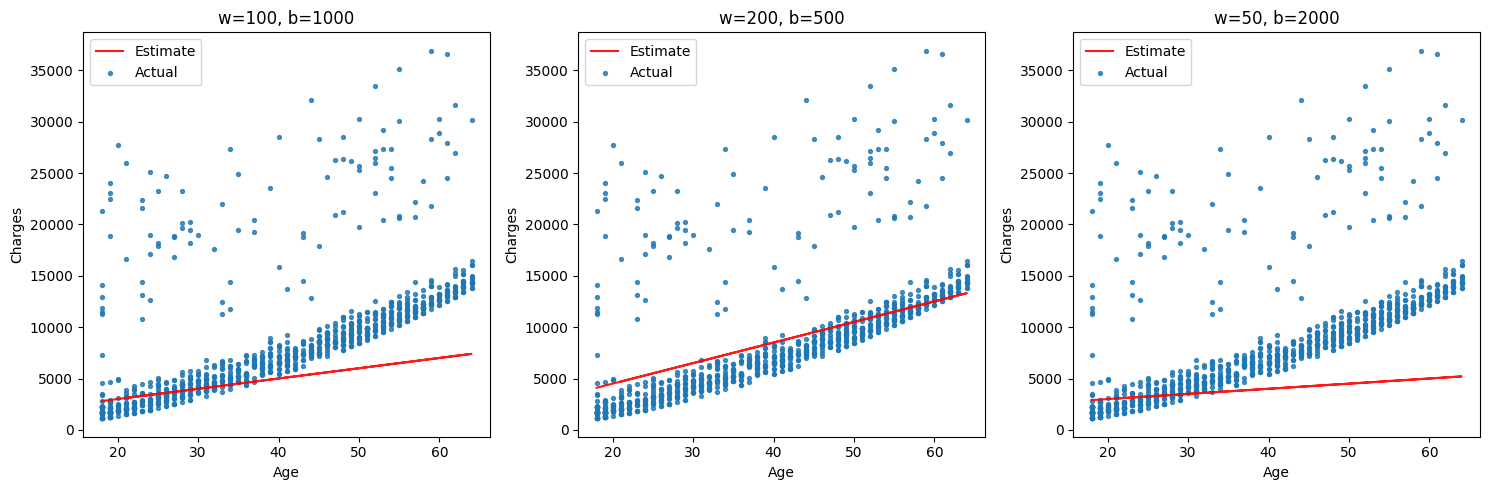

In [ ]:
# Спробуємо різні пари параметрів w та b
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
try_parameters(non_smoker_df, 100, 1000)
plt.title('w=100, b=1000')

plt.subplot(1, 3, 2)
try_parameters(non_smoker_df, 200, 500)
plt.title('w=200, b=500')

plt.subplot(1, 3, 3)
try_parameters(non_smoker_df, 50, 2000)
plt.title('w=50, b=2000')

plt.tight_layout()
plt.show()

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [ ]:
def rmse(actual, estimates):
    """Обчислює Root Mean Squared Error."""
    return np.sqrt(np.mean((actual - estimates)**2))

# Обчислення RMSE для кожної пари параметрів
w1, b1 = 100, 1000
estimates1 = estimate_charges(non_smoker_df.age, w1, b1)
rmse1 = rmse(non_smoker_df.charges, estimates1)
print(f"RMSE для w={w1}, b={b1}: {rmse1}")

w2, b2 = 200, 500
estimates2 = estimate_charges(non_smoker_df.age, w2, b2)
rmse2 = rmse(non_smoker_df.charges, estimates2)
print(f"RMSE для w={w2}, b={b2}: {rmse2}")

w3, b3 = 50, 2000
estimates3 = estimate_charges(non_smoker_df.age, w3, b3)
rmse3 = rmse(non_smoker_df.charges, estimates3)
print(f"RMSE для w={w3}, b={b3}: {rmse3}")

RMSE для w=100, b=1000: 6285.060000725581
RMSE для w=200, b=500: 4757.980240770584
RMSE для w=50, b=2000: 7143.359514502423
